# Import libraries

In [1]:
from sklearn.cluster import KMeans

# Custom functions

In [2]:
from google_map_data_toolkit import json_to_df, location_df_clean, \
    location_df_filter_by_allowed_cities, label_based_on_scraped_category

from elbow_plot_toolkit import determine_max_num_try_cluster, make_elbow_plot

from scrape_google_map_toolkit import scrape_all_categories_from_urls

from file_management_toolkit import judge_create_directory

from plt_map_toolkit import plt_scatter_map, plt_cluster_map

from folium_map_toolkit import generate_folium_map

# Create working directories

In [3]:
judge_create_directory('outputs/nc_wilmington') #This serves to save both the
# .csv for all the locations and the folium map

'You already have the directory outputs/nc_wilmington'

# Read in data

In [4]:
location_df = json_to_df('inputs/Saved Places.json')
location_df

,type,geometry.coordinates,geometry.type,properties.Google Maps URL,properties.Location.Geo Coordinates.Latitude,properties.Location.Geo Coordinates.Longitude,properties.Published,properties.Title,properties.Updated,properties.Location.Address,properties.Location.Business Name,properties.Location.Country Code
0,Feature,"[-77.9468116, 34.2203088]",Point,"http://maps.google.com/?q=1121+S+Front+St,+Wil...",34.2203088,-77.9468116,2023-05-24T02:39:52Z,"1121 S Front St, Wilmington, NC 28401",2023-05-24T02:39:52Z,NaN,NaN,NaN
1,Feature,"[-77.9485506, 34.202753]",Point,"http://maps.google.com/?q=128+Northern+Blvd,+W...",34.2027530,-77.9485506,2023-05-24T02:38:25Z,"128 Northern Blvd, Wilmington, NC 28401",2023-05-24T02:38:25Z,NaN,NaN,NaN
2,Feature,"[-77.9481014, 34.2274866]",Point,"http://maps.google.com/?q=604+S+Front+St,+Wilm...",34.2274866,-77.9481014,2023-05-24T02:36:17Z,"604 S Front St, Wilmington, NC 28401",2023-05-24T02:36:17Z,NaN,NaN,NaN
3,Feature,"[-77.9162323, 34.2366353]",Point,"http://maps.google.com/?q=109+Keaton+Ave,+Wilm...",34.2366353,-77.9162323,2023-05-24T02:33:45Z,"109 Keaton Ave, Wilmington, NC 28403",2023-05-24T02:33:45Z,NaN,NaN,NaN
4,Feature,"[-77.9499543, 34.2070819]",Point,http://maps.google.com/?cid=10276055318992992665,34.2070819,-77.9499543,2023-05-24T02:31:08Z,Winnie's Tavern,2023-05-24T02:31:08Z,"1895 Burnett Blvd, Wilmington, NC 28401, Unite...",Winnie's Tavern,US
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Feature,"[-121.75803, 38.55989]",Point,http://maps.google.com/?cid=9164329086331817507,38.5598900,-121.7580300,2015-09-21T15:54:28Z,Save Mart Shopping Center,2015-09-21T15:54:28Z,"1900 Anderson Rd, Davis, CA 95616, United States",Save Mart,US
1196,Feature,"[-121.766313, 38.5621327]",Point,http://maps.google.com/?cid=17895061991119134243,38.5621327,-121.7663130,2015-09-21T15:54:03Z,Safeway,2015-09-21T15:54:03Z,"1451 W Covell Blvd, Davis, CA 95616, United St...",Safeway,US
1197,Feature,"[-121.725185, 38.5413699]",Point,http://maps.google.com/?cid=11613917987081773243,38.5413699,-121.7251850,2015-09-21T15:53:54Z,Safeway,2015-09-21T15:53:54Z,"2121 Cowell Blvd, Davis, CA 95618, United States",Safeway,US
1198,Feature,"[-121.739497, 38.5427577]",Point,http://maps.google.com/?cid=7946426289309120022,38.5427577,-121.7394970,2015-09-21T15:31:28Z,CREAM of Davis,2015-09-21T15:31:28Z,"110 F St, Davis, CA 95616, United States",CREAM Davis,US


## Data cleaning

In [5]:
location_df_cleaned = location_df_clean(location_df)
location_df_cleaned

> Columns that contain the same data across all the rows are ['type', 'geometry.type'] and they are dropped.
> Columns picked by the user are ['geometry.coordinates', 'properties.Published', 'properties.Updated', 'properties.Location.Country Code'] and they are dropped.
> The issue with column properties.Title and properties.Location.Address has been corrected.
> Column properties.Title has been dropped since Column properties.Location.Business Name contains the same information
> All column headers have been renamed to be shorter.
> Numerical data (Latitude and Longitude) have been converted into numbers from strings.


,Google Maps URL,Latitude,Longitude,Address,Business Name
0,"http://maps.google.com/?q=1121+S+Front+St,+Wil...",34.220309,-77.946812,"1121 S Front St, Wilmington, NC 28401",NaN
1,"http://maps.google.com/?q=128+Northern+Blvd,+W...",34.202753,-77.948551,"128 Northern Blvd, Wilmington, NC 28401",NaN
2,"http://maps.google.com/?q=604+S+Front+St,+Wilm...",34.227487,-77.948101,"604 S Front St, Wilmington, NC 28401",NaN
3,"http://maps.google.com/?q=109+Keaton+Ave,+Wilm...",34.236635,-77.916232,"109 Keaton Ave, Wilmington, NC 28403",NaN
4,http://maps.google.com/?cid=10276055318992992665,34.207082,-77.949954,"1895 Burnett Blvd, Wilmington, NC 28401, Unite...",Winnie's Tavern
...,...,...,...,...,...
1195,http://maps.google.com/?cid=9164329086331817507,38.559890,-121.758030,"1900 Anderson Rd, Davis, CA 95616, United States",Save Mart
1196,http://maps.google.com/?cid=17895061991119134243,38.562133,-121.766313,"1451 W Covell Blvd, Davis, CA 95616, United St...",Safeway
1197,http://maps.google.com/?cid=11613917987081773243,38.541370,-121.725185,"2121 Cowell Blvd, Davis, CA 95618, United States",Safeway
1198,http://maps.google.com/?cid=7946426289309120022,38.542758,-121.739497,"110 F St, Davis, CA 95616, United States",CREAM Davis


## Data filtering

In [6]:
# Define the list of allowed cities used for filtering
allowed_cities = [
    'Wilmington',
    'Wrightsville Beach',
    'Winnabow',
    'Carolina Beach',
    'Kure Beach',
    'Southport',
    'Leland'
]

filtered_df = location_df_filter_by_allowed_cities(location_df_cleaned,
                                                   allowed_cities)
filtered_df

,Google Maps URL,Latitude,Longitude,Address,Business Name
0,"http://maps.google.com/?q=1121+S+Front+St,+Wil...",34.220309,-77.946812,"1121 S Front St, Wilmington, NC 28401",NaN
1,"http://maps.google.com/?q=128+Northern+Blvd,+W...",34.202753,-77.948551,"128 Northern Blvd, Wilmington, NC 28401",NaN
2,"http://maps.google.com/?q=604+S+Front+St,+Wilm...",34.227487,-77.948101,"604 S Front St, Wilmington, NC 28401",NaN
3,"http://maps.google.com/?q=109+Keaton+Ave,+Wilm...",34.236635,-77.916232,"109 Keaton Ave, Wilmington, NC 28403",NaN
4,http://maps.google.com/?cid=10276055318992992665,34.207082,-77.949954,"1895 Burnett Blvd, Wilmington, NC 28401, Unite...",Winnie's Tavern
...,...,...,...,...,...
74,http://maps.google.com/?cid=16640895103615944559,34.211340,-77.835097,"6206 Oleander Dr, Wilmington, NC 28403, United...",New Hanover County Arboretum | N.C. Cooperativ...
75,http://maps.google.com/?cid=12289764572912140843,34.206831,-77.906714,"3800 Canterbury Rd, Wilmington, NC 28403, Unit...",Stanley Rehder Carnivorous Plant Garden at Pin...
76,http://maps.google.com/?cid=16008575051297315101,34.220220,-77.785647,"1706 N Lumina Ave, Wrightsville Beach, NC 2848...",Holiday Inn Resort Lumina on Wrightsville Beac...
77,http://maps.google.com/?cid=2242603491420377344,34.209213,-77.794882,"38 N Lumina Ave, Wrightsville Beach, NC 28480,...",Jerry Allen's Sports Bar


# Scrape Google map for category of locations

In [7]:
full_df = scrape_all_categories_from_urls(filtered_df)
full_df

  0%|          | 0/79 [00:00<?, ?it/s]

,Google Maps URL,Latitude,Longitude,Address,Business Name,Extracted Category
0,"http://maps.google.com/?q=1121+S+Front+St,+Wil...",34.220309,-77.946812,"1121 S Front St, Wilmington, NC 28401",NaN,No Category
1,"http://maps.google.com/?q=128+Northern+Blvd,+W...",34.202753,-77.948551,"128 Northern Blvd, Wilmington, NC 28401",NaN,Building
2,"http://maps.google.com/?q=604+S+Front+St,+Wilm...",34.227487,-77.948101,"604 S Front St, Wilmington, NC 28401",NaN,Building
3,"http://maps.google.com/?q=109+Keaton+Ave,+Wilm...",34.236635,-77.916232,"109 Keaton Ave, Wilmington, NC 28403",NaN,Building
4,http://maps.google.com/?cid=10276055318992992665,34.207082,-77.949954,"1895 Burnett Blvd, Wilmington, NC 28401, Unite...",Winnie's Tavern,Bar & grill
...,...,...,...,...,...,...
74,http://maps.google.com/?cid=16640895103615944559,34.211340,-77.835097,"6206 Oleander Dr, Wilmington, NC 28403, United...",New Hanover County Arboretum | N.C. Cooperativ...,Arboretum
75,http://maps.google.com/?cid=12289764572912140843,34.206831,-77.906714,"3800 Canterbury Rd, Wilmington, NC 28403, Unit...",Stanley Rehder Carnivorous Plant Garden at Pin...,Nature preserve
76,http://maps.google.com/?cid=16008575051297315101,34.220220,-77.785647,"1706 N Lumina Ave, Wrightsville Beach, NC 2848...",Holiday Inn Resort Lumina on Wrightsville Beac...,No Category
77,http://maps.google.com/?cid=2242603491420377344,34.209213,-77.794882,"38 N Lumina Ave, Wrightsville Beach, NC 28480,...",Jerry Allen's Sports Bar,Bar


In [8]:
full_df_labeled = label_based_on_scraped_category(full_df)
full_df_labeled #You'd better check all the Category with your own eyes

,Google Maps URL,Latitude,Longitude,Address,Business Name,Extracted Category,Category
0,"http://maps.google.com/?q=1121+S+Front+St,+Wil...",34.220309,-77.946812,"1121 S Front St, Wilmington, NC 28401",NaN,No Category,Site
1,"http://maps.google.com/?q=128+Northern+Blvd,+W...",34.202753,-77.948551,"128 Northern Blvd, Wilmington, NC 28401",NaN,Building,Site
2,"http://maps.google.com/?q=604+S+Front+St,+Wilm...",34.227487,-77.948101,"604 S Front St, Wilmington, NC 28401",NaN,Building,Site
3,"http://maps.google.com/?q=109+Keaton+Ave,+Wilm...",34.236635,-77.916232,"109 Keaton Ave, Wilmington, NC 28403",NaN,Building,Site
4,http://maps.google.com/?cid=10276055318992992665,34.207082,-77.949954,"1895 Burnett Blvd, Wilmington, NC 28401, Unite...",Winnie's Tavern,Bar & grill,Restaurant
...,...,...,...,...,...,...,...
74,http://maps.google.com/?cid=16640895103615944559,34.211340,-77.835097,"6206 Oleander Dr, Wilmington, NC 28403, United...",New Hanover County Arboretum | N.C. Cooperativ...,Arboretum,Garden
75,http://maps.google.com/?cid=12289764572912140843,34.206831,-77.906714,"3800 Canterbury Rd, Wilmington, NC 28403, Unit...",Stanley Rehder Carnivorous Plant Garden at Pin...,Nature preserve,Garden
76,http://maps.google.com/?cid=16008575051297315101,34.220220,-77.785647,"1706 N Lumina Ave, Wrightsville Beach, NC 2848...",Holiday Inn Resort Lumina on Wrightsville Beac...,No Category,Site
77,http://maps.google.com/?cid=2242603491420377344,34.209213,-77.794882,"38 N Lumina Ave, Wrightsville Beach, NC 28480,...",Jerry Allen's Sports Bar,Bar,Restaurant


# Save df before mapping

In [9]:
full_df_labeled.to_csv(
    'outputs/nc_wilmington/nc_wilmington.csv',
    index=False
)

# Map out places for Wilmington

## Clustering preparation

In [10]:
full_df_labeled[
    full_df_labeled['Category'] == 'Closed'] #These are the places that are
# "Permanently Closed" or "Temporarily Closed" and they won't be mapped

,Google Maps URL,Latitude,Longitude,Address,Business Name,Extracted Category,Category
41,http://maps.google.com/?cid=4232548752771832911,34.223033,-77.819828,"1981 Eastwood Rd, Wilmington, NC 28403, United...",Port City Chop House,Permanently closed,Closed


In [11]:
open_df = full_df_labeled[
    full_df_labeled['Category'] != 'Closed'].copy() #I don't visit
# permanently closed locations

In [12]:
df_restaurant = open_df[
    open_df['Category'] == 'Restaurant'].copy()

df_no_restaurant = open_df[
    open_df['Category'] != 'Restaurant'].copy()  # Create a new
# dataframe without the Restaurant category. This is because I don't visit
# restaurants just for restaurants

In [13]:
X = df_no_restaurant[['Longitude',
                      'Latitude']].values  # Extract the Longitude and Latitude columns from the new dataframe

X

array([[-77.9468116,  34.2203088],
       [-77.9485506,  34.202753 ],
       [-77.9481014,  34.2274866],
       [-77.9162323,  34.2366353],
       [-77.9435807,  34.2355199],
       [-77.9322152,  34.237174 ],
       [-77.9447576,  34.2377658],
       [-77.9493396,  34.2352707],
       [-77.8962695,  34.0444661],
       [-77.9461752,  34.0404327],
       [-77.9491796,  34.2351119],
       [-77.943339 ,  34.2357741],
       [-77.9450902,  34.2422264],
       [-78.1158258,  34.1619209],
       [-77.9074609,  34.1775833],
       [-77.9398012,  34.2102013],
       [-77.9442322,  34.2146613],
       [-77.8576312,  34.1563442],
       [-77.8515264,  34.1231687],
       [-77.9409717,  33.9367264],
       [-77.9431831,  34.2322386],
       [-77.9493728,  34.2394646],
       [-77.9485666,  34.2381179],
       [-77.945638 ,  34.237249 ],
       [-77.9499727,  34.2352196],
       [-77.9261189,  33.9626558],
       [-77.8041954,  34.2165388],
       [-77.917734 ,  33.971612 ],
       [-77.9138889,

### Optimal cluster number determination

  0%|          | 0/66 [00:00<?, ?it/s]

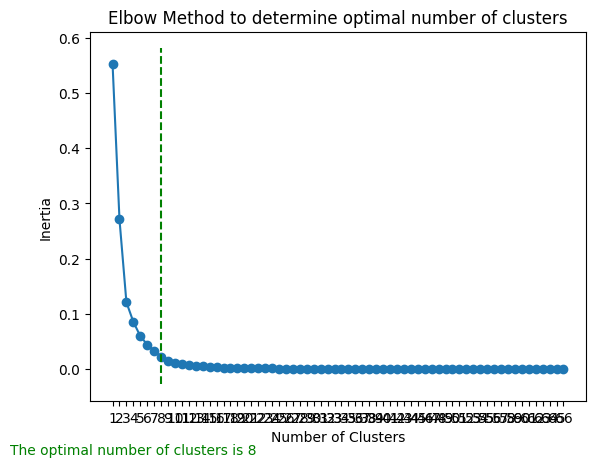

In [14]:
max_num_try_cluster = determine_max_num_try_cluster(X)
optimal_cluster_num = make_elbow_plot(X, max_num_try_cluster)

## Plt map
* Can do clustering on the sites excluding restaurants

### Plt scatter map
This tells you the distribution of different categories

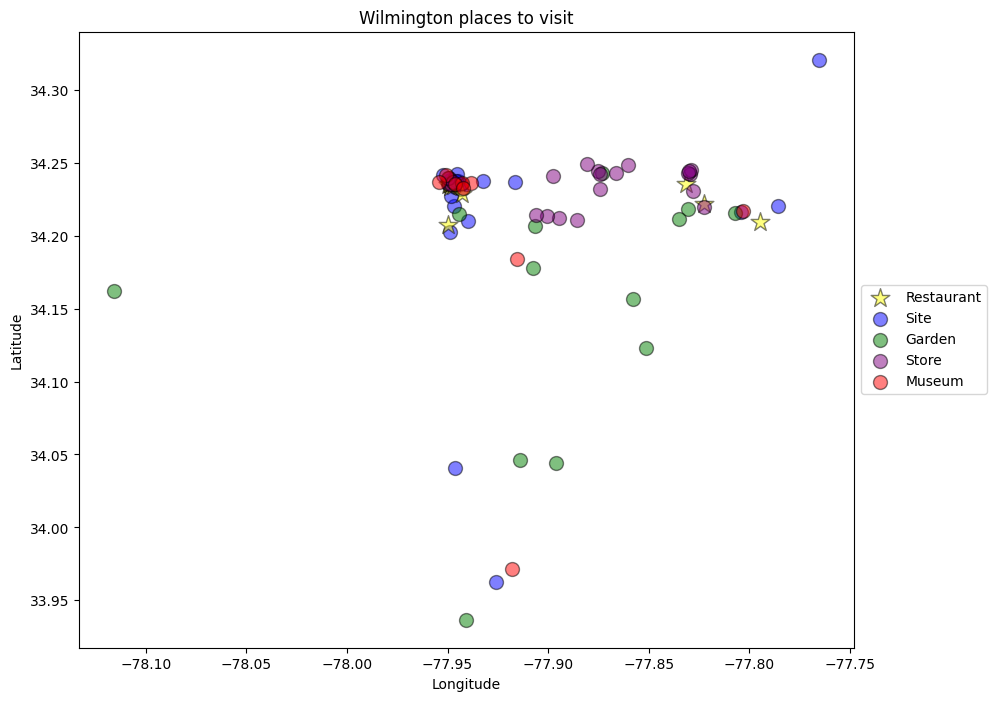

In [15]:
plt_scatter_map('Wilmington', open_df)

### Plt cluster map
This tells you the clustering of all the locations

In [16]:
# Perform KMeans clustering on the data points
num_cluster = int(input('How many clusters do you want? The recommendation '
                        'is {}'.format(
    optimal_cluster_num)) or optimal_cluster_num)  #You
# can give a number for clustering or just use the recommended number

kmeans = KMeans(
    n_clusters=num_cluster,
    n_init=30
)

df_no_restaurant['Cluster'] = kmeans.fit_predict(
    df_no_restaurant[['Latitude', 'Longitude']])  # Add
# the cluster labels as a new column to the dataframe

#The 2 lines below move the Cluster column to be the 1st column
cluster = df_no_restaurant.pop('Cluster')
df_no_restaurant.insert(0, 'Cluster', cluster)

df_no_restaurant = df_no_restaurant.sort_values(
    by=['Cluster'])  # Sort the DataFrame by the Cluster column

df_no_restaurant

,Cluster,Google Maps URL,Latitude,Longitude,Address,Business Name,Extracted Category,Category
11,0,http://maps.google.com/?cid=3377690054998686978,34.040433,-77.946175,"8884 St Phillips Rd SE, Winnabow, NC 28479, Un...",Brunswick Town/Fort Anderson State Historic Site,Historical landmark,Site
31,0,http://maps.google.com/?cid=10439080496692707547,34.045936,-77.913889,"1010 State Park Rd, Carolina Beach, NC 28428, ...",Carolina Beach State Park,State park,Garden
10,0,http://maps.google.com/?cid=3783086237057084711,34.044466,-77.896270,"Carolina Beach, NC 28428, United States",Joseph Ryder Lewis Park,Park,Garden
25,1,http://maps.google.com/?cid=7302633907011618435,34.238118,-77.948567,"226 N Front St Suite 130, Wilmington, NC 28401...",Wilmington Downtown Incorporated,Non-profit organization,Site
26,1,http://maps.google.com/?cid=2595995531787354740,34.237249,-77.945638,"310 Chestnut St, Wilmington, NC 28401, United ...",Historic Thalian Hall,Performing arts theater,Site
...,...,...,...,...,...,...,...,...
48,6,http://maps.google.com/?cid=16643473537394430103,34.241050,-77.897550,"3908 Market St #104, Wilmington, NC 28403, Uni...",Buried under comics and toys,Comic book store,Store
35,6,http://maps.google.com/?cid=16745873089226105013,34.248796,-77.860261,"5726 Market St, Wilmington, NC 28405, United S...",Stone Garden,Landscaping supply store,Store
56,6,http://maps.google.com/?cid=15727418766798336168,34.242203,-77.874065,"5226 Sigmon Rd, Wilmington, NC 28403, United S...",Walmart Supercenter,Department store,Store
36,6,http://maps.google.com/?cid=7081790755631536117,34.242700,-77.873440,"5226 Sigmon Rd, Wilmington, NC 28403, United S...",Walmart Garden Center,Garden center,Garden


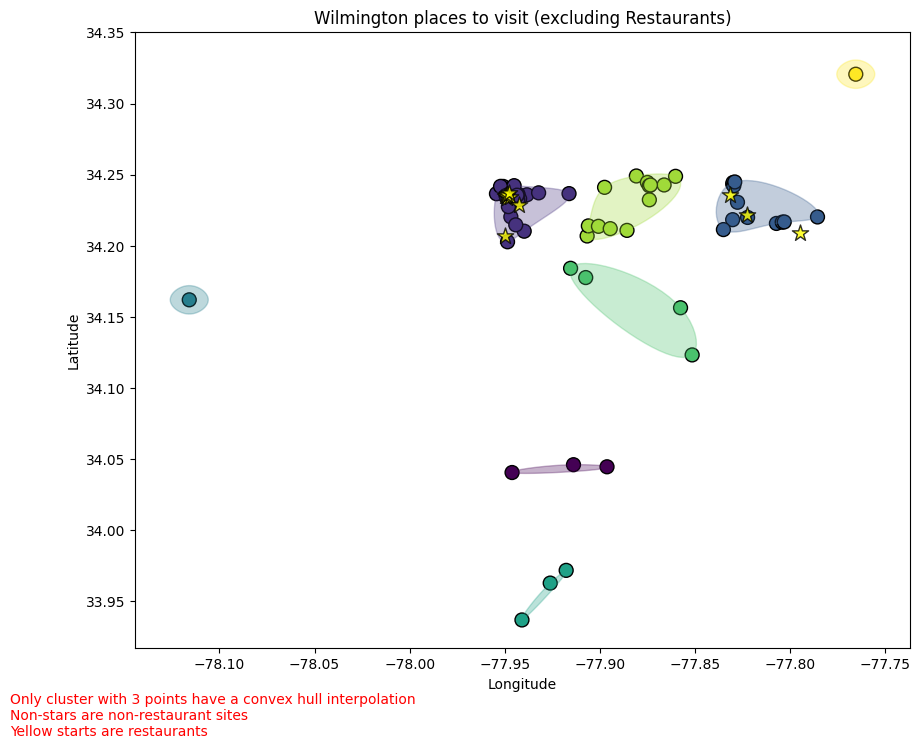

In [17]:
plt_cluster_map('Wilmington', df_no_restaurant, df_restaurant)

## Folium map

### Initialize the map

In [18]:
my_map = generate_folium_map(open_df, df_no_restaurant, num_cluster)
my_map

### Save the map as interactive html

In [19]:
my_map.save('outputs/nc_wilmington/nc_wilmington.html')

print('HTML map saved!')

HTML map saved!
